In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import dhs_util
from dhs_util import *

In [2]:
os.chdir(r'D:\data485')
df = pd.read_csv(r'valorant dataset.csv')
df

,agent,map,kda,kill,death,assistant,win rate,defender win rate,attack win rate,pick rate,total game
0,raze,all,1.00,11.0?,?11.0?,?3.5,50.20%,50.18%,49.73%,10.00%,"1,047,336"
1,killjoy,all,0.96,11.0?,?11.4?,?3.4,51.80%,51.24%,50.40%,6.00%,"626,892"
2,sage,all,0.90,10.8?,?12.0?,?3.7,50.80%,50.19%,50.34%,13.50%,"1,414,077"
3,brimstone,all,0.91,11.2?,?12.3?,?4.9,49.30%,49.94%,49.90%,3.40%,"357,714"
4,reyna,all,1.15,13.5?,?11.8?,?3.3,51.20%,50.16%,50.52%,13.30%,"1,400,664"
...,...,...,...,...,...,...,...,...,...,...,...
100,skye,breeze,0.93,10.4?,?11.2?,?3.0,49.20%,49.08%,51.19%,4.80%,"76,755"
101,phoenix,breeze,0.98,10.6?,?10.7?,?2.8,49%,48.07%,51.34%,5.80%,"92,667"
102,astra,breeze,0.93,10.2?,?11.0?,?3.0,45.10%,48.63%,51.08%,1%,"15,708"
103,cypher,breeze,0.95,10.4?,?10.9?,?3.1,50.10%,47.47%,51.13%,2.60%,"41,310"


In [3]:
from mlxtend.preprocessing import *
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns import hmine


In [4]:
df.groupby('agent').count()

,map,kda,kill,death,assistant,win rate,defender win rate,attack win rate,pick rate,total game
agent,,,,,,,,,,
astra,7,7,7,7,7,7,7,7,7,7
breach,7,7,7,7,7,7,7,7,7,7
brimstone,7,7,7,7,7,7,7,7,7,7
cypher,7,7,7,7,7,7,7,7,7,7
jett,7,7,7,7,7,7,7,7,7,7
killjoy,7,7,7,7,7,7,7,7,7,7
omen,7,7,7,7,7,7,7,7,7,7
phoenix,7,7,7,7,7,7,7,7,7,7
raze,7,7,7,7,7,7,7,7,7,7


By executing count(), it shows that this dataset counts the different stats of the different agents in the game Valorant on all 6 maps.


Now, I want to know who is the most popular agent on all maps.

In [5]:
# Convert back to numeric, setting any invalid parsing to NaN
df['total game'] = df['total game'].str.replace(',', '', regex=False).str.strip()
df['total game'] = pd.to_numeric(df['total game'], errors='coerce')

df1 = df[df['map'] == 'all']
df_popular = df1.sort_values(by='total game', ascending=False)

In [6]:
df_popular

,agent,map,kda,kill,death,assistant,win rate,defender win rate,attack win rate,pick rate,total game
8,jett,all,1.11,12.6?,?11.4?,?3.0,50.20%,49.94%,50.27%,13.50%,1421013.0
2,sage,all,0.90,10.8?,?12.0?,?3.7,50.80%,50.19%,50.34%,13.50%,1414077.0
4,reyna,all,1.15,13.5?,?11.8?,?3.3,51.20%,50.16%,50.52%,13.30%,1400664.0
0,raze,all,1.00,11.0?,?11.0?,?3.5,50.20%,50.18%,49.73%,10.00%,1047336.0
6,sova,all,0.94,10.9?,?11.6?,?4.4,49.30%,49.89%,49.86%,7.50%,786216.0
9,omen,all,0.96,12.1?,?12.6?,?4.0,48.90%,49.67%,49.73%,6.70%,698343.0
11,phoenix,all,0.99,10.9?,?11.0?,?2.9,49.50%,49.24%,49.68%,6.20%,648975.0
1,killjoy,all,0.96,11.0?,?11.4?,?3.4,51.80%,51.24%,50.40%,6.00%,626892.0
5,viper,all,0.94,10.9?,?11.6?,?3.9,48.50%,49.96%,50.16%,4.80%,499902.0
14,yoru,all,0.93,9.6?,?10.3?,?2.4,46.50%,47.68%,49.00%,4.30%,448698.0


From the data shown above, we can conclude that Jett is the most popular agent on all maps. 

From this bar chart, we can see that there is a huge difference on total games between different agents.

Then, I want to measure who is the strongest agent by measuring the average win rate on all maps.

In [7]:
# Clean the 'win rate' column
df['win rate'] = df['win rate'].str.replace('%', '', regex=False).str.strip()  # Remove '%' and spaces

# Convert 'win rate' column to numeric and sort the data
df['win rate'] = pd.to_numeric(df['win rate'], errors='coerce')  # Invalid parsing will be set as NaN
df_sorted = df.sort_values(by='win rate', ascending=False)  # Sort in descending order

In [8]:
df_sorted

,agent,map,kda,kill,death,assistant,win rate,defender win rate,attack win rate,pick rate,total game
61,killjoy,ascent,0.99,11.3?,?11.5?,?3.6,53.1,52.90%,48.76%,6.90%,123420.0
76,killjoy,icebox,0.95,10.9?,?11.5?,?3.5,53.0,49.96%,51.65%,5.70%,98787.0
91,killjoy,breeze,0.93,10.0?,?10.8?,?3.2,52.6,49.23%,52.13%,4.90%,77673.0
31,killjoy,bind,0.97,11.1?,?11.4?,?3.5,52.3,52.74%,49.30%,6.20%,111333.0
1,killjoy,all,0.96,11.0?,?11.4?,?3.4,51.8,51.24%,50.40%,6.00%,626892.0
...,...,...,...,...,...,...,...,...,...,...,...
74,yoru,ascent,0.92,9.5?,?10.4?,?2.4,46.4,48.67%,47.71%,3.90%,70278.0
89,yoru,icebox,0.94,9.6?,?10.3?,?2.4,46.1,46.59%,50.09%,4.30%,74511.0
28,cypher,split,0.95,11.5?,?12.1?,?3.7,45.7,51.85%,47.75%,5.20%,44013.0
102,astra,breeze,0.93,10.2?,?11.0?,?3.0,45.1,48.63%,51.08%,1%,15708.0


The data above shows an agent's performance on one map and this is sorted by win rates.

However, this is not overall enough to see an agent's capability. Using pick rate and win rate of an agent on all maps will better evaluate this agent's capability.

In [9]:
def agent_performance(df): #function for displaying data
    df1 = df.groupby('agent').first().reset_index()[['agent', 'win rate', 'pick rate']]
    return df1

In [10]:
df_performance = agent_performance(df1) # df1 is the dataframe of agents' performance on all maps
df_performance

,agent,win rate,pick rate
0,astra,47.70%,1.10%
1,breach,49.00%,2.40%
2,brimstone,49.30%,3.40%
3,cypher,50%,4%
4,jett,50.20%,13.50%
5,killjoy,51.80%,6.00%
6,omen,48.90%,6.70%
7,phoenix,49.50%,6.20%
8,raze,50.20%,10.00%
9,reyna,51.20%,13.30%


By referring to the data above, the agents with higher pick rates and win rates are considered "stronger". So Jett, Reyna, Sage, adn Raze are the top 4 since they all have pick rates over 10% and win rates over 50%.

C:\Users\94202\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\94202\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\94202\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


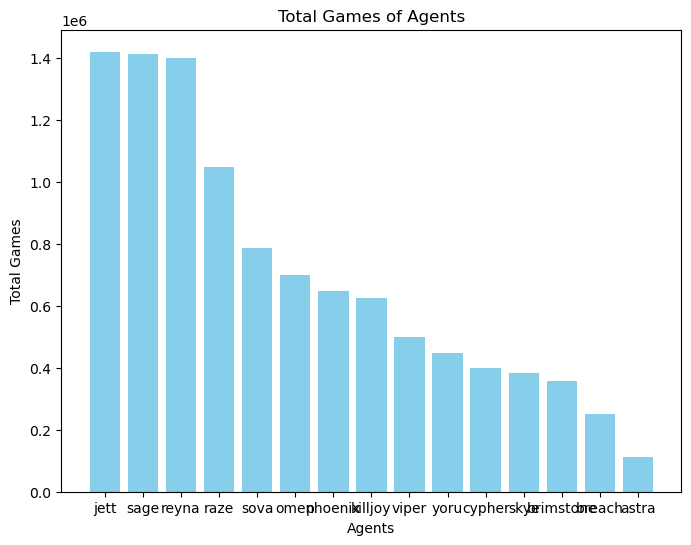

In [11]:
df_pick = df_popular[['agent', 'total game']]

plt.figure(figsize=(8, 6))
plt.bar(df_pick['agent'], df_pick['total game'], color='skyblue')

plt.title('Total Games of Agents')
plt.xlabel('Agents')
plt.ylabel('Total Games')

plt.show()

This bar chart of total games also shows the huge difference on pick rates between different agents. Since the agents with higher pick rates also have higher win rates, we can conclude that this game is not balances agent-wise.
In addition to capabilities, we also want to know an agent's consistency in different maps. We want to see if there are any agents whose performance varies particularly from map to map.

In [12]:
df_map = df.pivot_table(
    values='win rate', 
    index=["agent"], columns="map", aggfunc='mean'
    )
df_map

map,all,ascent,bind,breeze,haven,icebox,split
agent,,,,,,,
astra,47.7,49.6,47.9,45.1,48.0,47.5,49.7
breach,49.0,47.7,47.0,47.7,50.5,51.1,49.0
brimstone,49.3,50.3,51.0,48.4,48.4,47.5,50.2
cypher,50.0,49.3,50.2,50.1,50.5,48.9,45.7
jett,50.2,49.3,50.0,50.8,50.2,51.0,50.8
killjoy,51.8,53.1,52.3,52.6,51.2,53.0,51.7
omen,48.9,49.2,48.6,48.7,49.2,48.2,51.2
phoenix,49.5,50.5,49.0,49.0,49.1,50.0,50.0
raze,50.2,50.6,49.5,50.2,51.0,49.4,49.9


Yoru is the most unstable one with the greatest difference of 4.7% and Reyna just consistently performs well on every map.

Then we want to check if the game is balanced


In [13]:
df_map['cohort'] = df_map['all'].apply(lambda x: 'win rate >= 50%' if x >= 50 else 'win rate < 50%')
print(df_map)

map         all  ascent  bind  breeze  haven  icebox  split           cohort
agent                                                                       
astra      47.7    49.6  47.9    45.1   48.0    47.5   49.7   win rate < 50%
breach     49.0    47.7  47.0    47.7   50.5    51.1   49.0   win rate < 50%
brimstone  49.3    50.3  51.0    48.4   48.4    47.5   50.2   win rate < 50%
cypher     50.0    49.3  50.2    50.1   50.5    48.9   45.7  win rate >= 50%
jett       50.2    49.3  50.0    50.8   50.2    51.0   50.8  win rate >= 50%
killjoy    51.8    53.1  52.3    52.6   51.2    53.0   51.7  win rate >= 50%
omen       48.9    49.2  48.6    48.7   49.2    48.2   51.2   win rate < 50%
phoenix    49.5    50.5  49.0    49.0   49.1    50.0   50.0   win rate < 50%
raze       50.2    50.6  49.5    50.2   51.0    49.4   49.9  win rate >= 50%
reyna      51.2    50.6  51.3    51.6   51.2    50.7   50.6  win rate >= 50%
sage       50.8    50.7  51.4    50.7   50.4    50.0   50.3  win rate >= 50%

In [14]:
cohort_summary = df_map.groupby('cohort').size()
print(cohort_summary)





cohort
win rate < 50%     9
win rate >= 50%    6
dtype: int64


* Cohort 1 as those who has a win rate less than 50%
* Cohort 2 as those who has a win rate greater than or equal to 50

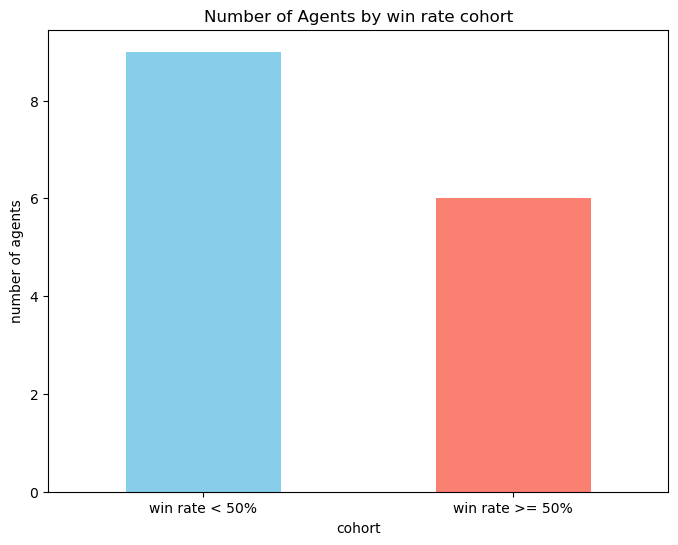

In [15]:
cohort_counts = df_map['cohort'].value_counts()

plt.figure(figsize=(8,6))
cohort_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Number of Agents by win rate cohort')
plt.xlabel('cohort')
plt.ylabel('number of agents')
plt.xticks(rotation=0)

plt.show()


From data shown above, we can see that there are obviously more agents with a win rate lower than 50%, which implies that this game is not balanced. Combined with the previous data, we find that several agents are very dominant, which further illustrates the imbalance of the game, where powerful agents are too powerful and weak agents are too weak.

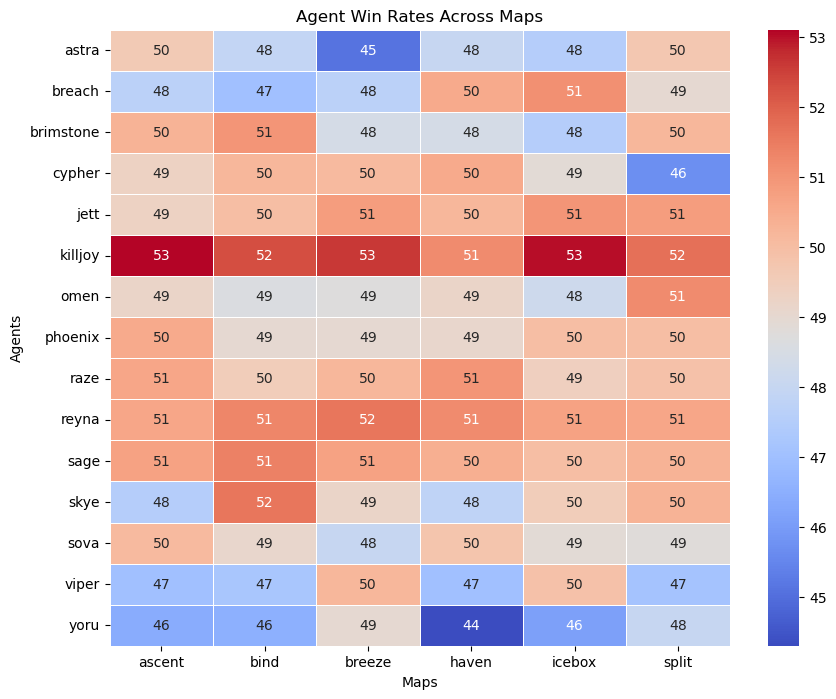

In [16]:

# Drop 'all', focus on each map
df_win_rates = df_map.drop('all', axis=1)
df_win_rates = df_win_rates.drop('cohort', axis=1)



plt.figure(figsize=(10, 8))
sns.heatmap(df_win_rates, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Agent Win Rates Across Maps')
plt.xlabel('Maps')
plt.ylabel('Agents')

# Display the heatmap
plt.show()

From this heatmap, we can see how each agent behaves on different maps. The data here is also consistent with what we observed earlier, that there is a huge difference between the strengths of the agents.
After analyzing the agents, we also want to analyze the maps.

In [17]:
# Step 1: Remove '%' and convert to numeric
df['attack win rate'] = df['attack win rate'].str.rstrip('%').astype('float') / 100
df['defender win rate'] = df['defender win rate'].str.rstrip('%').astype('float') / 100

# Step 2: Group by 'map' and calculate average attack and defense win rates for each map
df_map_rates = df.groupby('map').agg(
    avg_attack_win_rate=('attack win rate', 'mean'),
    avg_defense_win_rate=('defender win rate', 'mean')
)


# Display the result
print(df_map_rates)

        avg_attack_win_rate  avg_defense_win_rate
map                                              
all                0.498787              0.497660
ascent             0.484687              0.510940
bind               0.485813              0.510920
breeze             0.514187              0.482080
haven              0.508707              0.489467
icebox             0.513793              0.481307
split              0.485493              0.510720


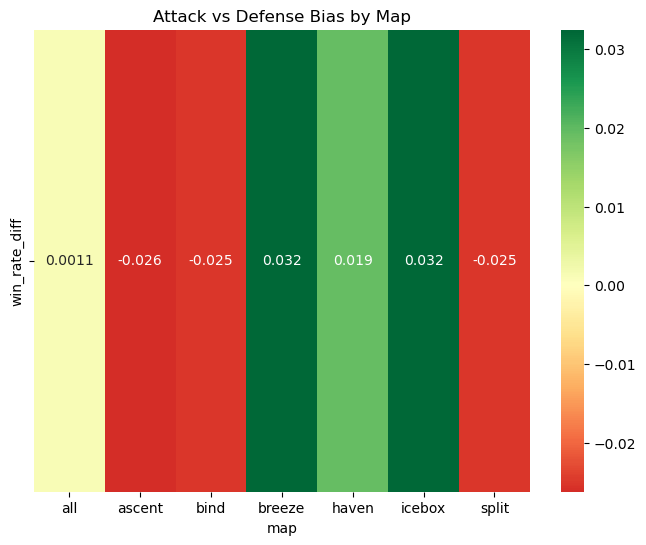

In [18]:
# Calculate the difference between attack and defense win rates
df_map_rates['win_rate_diff'] = df_map_rates['avg_attack_win_rate'] - df_map_rates['avg_defense_win_rate']

# Plot a heatmap of the difference
plt.figure(figsize=(8, 6))
sns.heatmap(df_map_rates[['win_rate_diff']].T, cmap='RdYlGn', annot=True, center=0)
plt.title('Attack vs Defense Bias by Map')
plt.show()

According to the data, breeze and icebox are heavily attack-sided maps while ascent, bind, and split are heavily defense-sided. 
Overall, all maps are pretty balanced and a little defense-sided.